# Support Vector Machine (SVM) - Classification

### What is SVM?
Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for **classification** and **regression**.  
In classification, SVM finds the **optimal hyperplane** that best separates different classes in the feature space.  

- **Margin:** SVM maximizes the distance (margin) between the separating hyperplane and the closest data points (support vectors).  
- **Kernels:** When data is not linearly separable, SVM uses kernel functions (like **RBF**) to project it into higher dimensions where separation is possible.  

### Why Breast Cancer Dataset?
- A well-known dataset with 30 numeric features describing tumors.  
- Target variable:  
  - `0 = malignant` (cancerous)  
  - `1 = benign` (non-cancerous)  
- Goal: Predict whether a tumor is malignant or benign.  

### What We Do in This Notebook:
1. Load the **Breast Cancer dataset**.  
2. Split into **training and test sets**.  
3. Use **GridSearchCV** to tune hyperparameters (`C`, `gamma`, `kernel`).  
4. Train the best SVM model.  
5. Evaluate performance using:  
   - **Accuracy Score**  
   - **Classification Report** (precision, recall, f1-score)  
   - **Confusion Matrix Visualization**  

### Expected Output
- Best hyperparameters chosen by GridSearchCV.  
- High accuracy (typically > 90%) on the test set.  
- Clear confusion matrix showing classification results.  


### SVM Classification on Breast Cancer Dataset

In [31]:
#  Imports 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [32]:
# Load dataset 
# Breast Cancer dataset: 30 features of tumors
# Target: 0 = malignant, 1 = benign
data = load_breast_cancer()
X, y = data.data, data.target
# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define parameter grid for hyperparameter tuning 
param_grid = {
    'C': [0.1, 1, 10],             # Regularization strength
    'gamma': [0.01, 0.1, 'scale'], # Kernel coefficient
    'kernel': ['rbf']              # Radial Basis Function kernel
}


In [34]:
# Train with GridSearchCV
gcv = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
gcv.fit(X_train, y_train)

best_model = gcv.best_estimator_
print("Best Parameters:", gcv.best_params_)


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [35]:
# Evaluate on test set
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



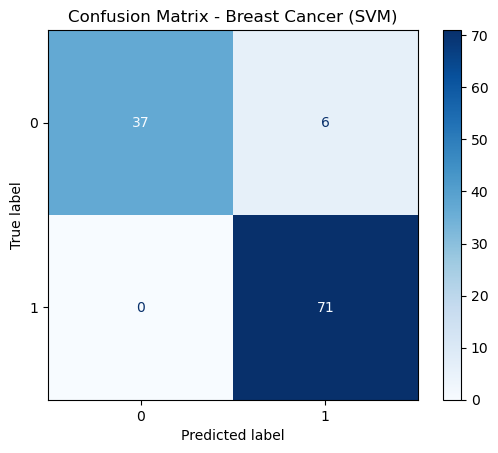

In [36]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Breast Cancer (SVM)")
plt.show()